## 1. Acceso a datos

Lea el archivo y guardelo en un DataFrame de pandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/datasets/Chocolate Sales.csv"

data = pd.read_csv(path)

data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


Calcule la cantidad de filas y de columnas presentes en el archivo.

In [ ]:
filas, columnas = data.shape

print(f"filas: {filas}")
print(f"columnas: {columnas}")

filas: 1094
columnas: 6


## 2. Exploración inicial de datos

Identifique que tipo de dato se encuentra en cada columna

In [ ]:
# Tipo de dato de cada columna

data.dtypes

,0
Sales Person,object
Country,object
Product,object
Date,object
Amount,object
Boxes Shipped,int64


Para cada variable numérica, encuentre los valores mínimos y máximos y las medias muestrales.

In [ ]:
# La unica variable de tipo numerico es "boxes shipped", y la columna amount es debatible porque se refiere a una cantidad numerica pero su tipo no es numerico, entonces la transformo igual

data['Amount'] = pd.to_numeric(data['Amount'].str.replace('$','').str.replace(',',''))
data.describe()


,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


Para las variables categóricas, encuentre la cantidad de valores unicos.

In [ ]:
# Podria buscar cada nombre de columna porque en este caso son poquitas, pero doy una solucion mas general en caso sean muchas

data_ = data.select_dtypes(exclude=['int', 'float']) #Aca filtro los tipos asi solo quedan las cols categoricas

for col in data_.columns:
    print(f"\nVariable Categorica: {col} \n")
    #print(data_[col].unique()) # Datos unicos en la col
    print(f"Cantidad de categorias distintas: {len(data_[col].unique())}\n") # Cantidad de datos unicos en la columna
    print(data_[col].value_counts(dropna=False)) # Cuento los datos unicos


Variable Categorica: Sales Person 

Cantidad de categorias distintas: 25

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64

Variable Categorica: Country 

Cantidad de categorias distintas: 6

Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64

Variable Categoric

Determine si existen datos faltantes y en ese caso contar cuantos datos faltan en cada columna

In [ ]:
# Como vimos en cada columna categorica conté la cantidad de valores faltantes y da 0, pero falta la columna numerica, aprovecho para corroborar
print("\nCantidad de valores faltantes en cada columna:\n", data.isnull().sum())


Cantidad de valores faltantes en cada columna:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


Calcule el precio por caja y agregue este dato como columna en el DataFrame

In [ ]:
#Nueva col con el precio por caja
data['Price per Box'] = data['Amount'] / data['Boxes Shipped']
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Price per Box
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180,29.555556
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184,74.375000
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,4410,323,13.653251
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,6559,119,55.117647
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574,217,2.645161
1092,Dotty Strutley,India,Eclairs,28-Jul-22,2086,384,5.432292


## 3. Realice las siguientes visualizaciones:

grafico de barras del ingreso por ventas segun el tipo de producto

<Axes: xlabel='Product', ylabel='Amount'>

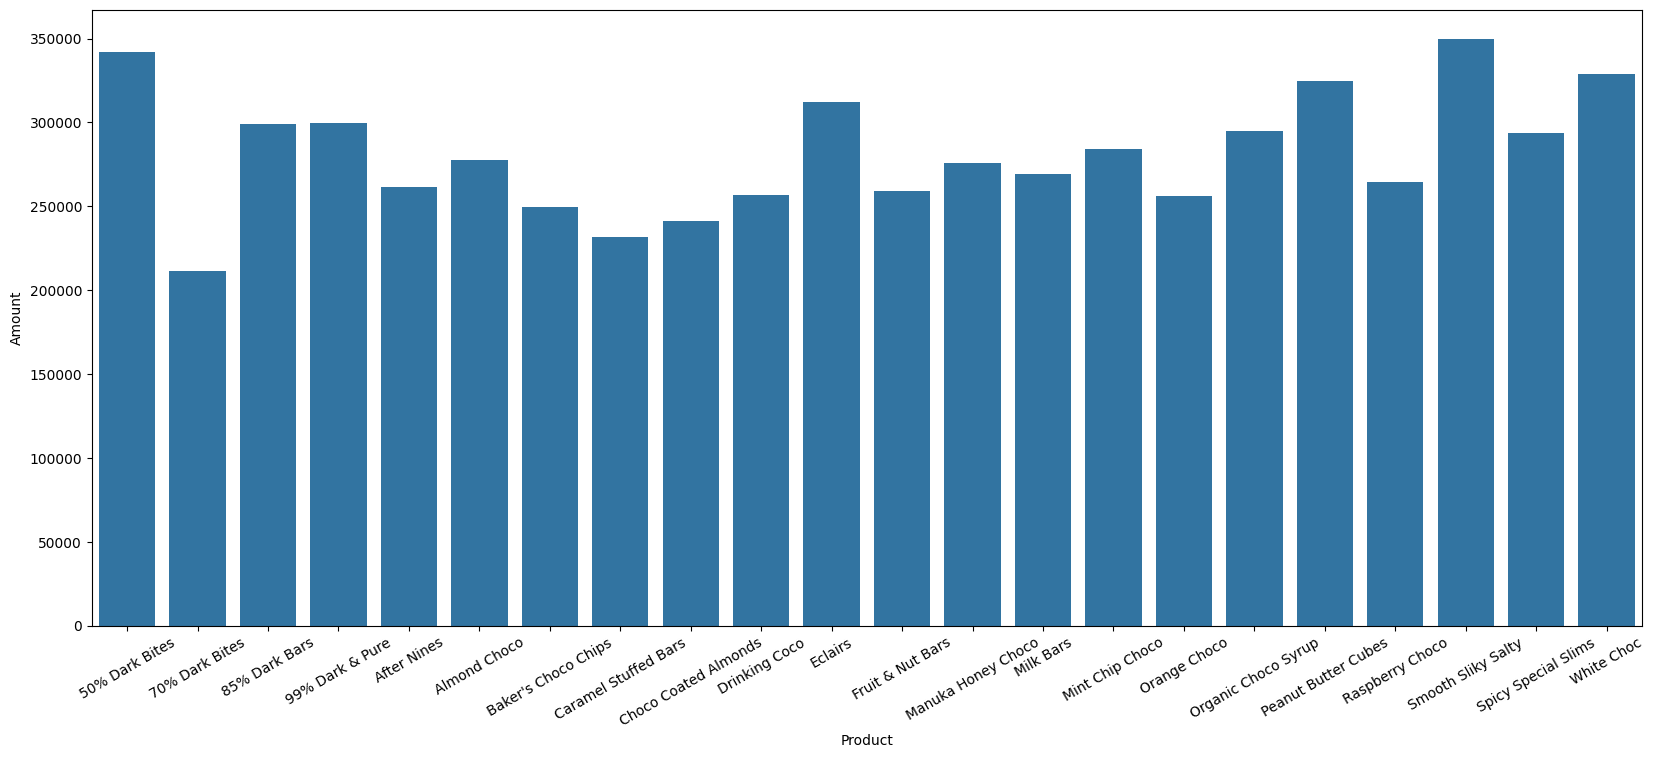

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=30)
sns.barplot(data=data.groupby('Product')["Amount"].sum().reset_index(), x='Product', y='Amount')

histograma del ingreso por ventas

<Axes: xlabel='Amount', ylabel='Count'>

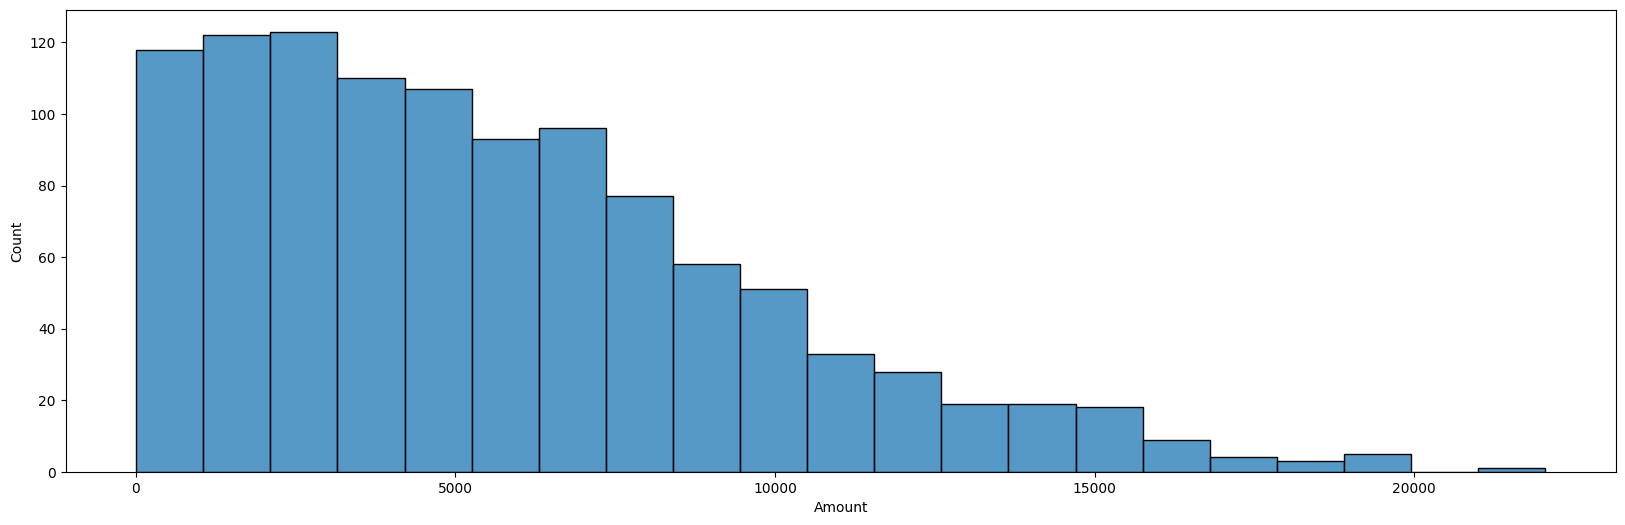

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(data=data, x="Amount")

serie temporal de la cantidad de ventas por dia.

In [ ]:
#Cambio el tipo de dato de columna Date

data['Date'] = pd.to_datetime(data['Date'])
data['Date']

<ipython-input-35-94f23f2fc9ec>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,Date
0,2022-01-04
1,2022-08-01
2,2022-07-07
3,2022-04-27
4,2022-02-24
...,...
1089,2022-05-17
1090,2022-06-07
1091,2022-07-26
1092,2022-07-28


<Axes: xlabel='Date', ylabel='Amount'>

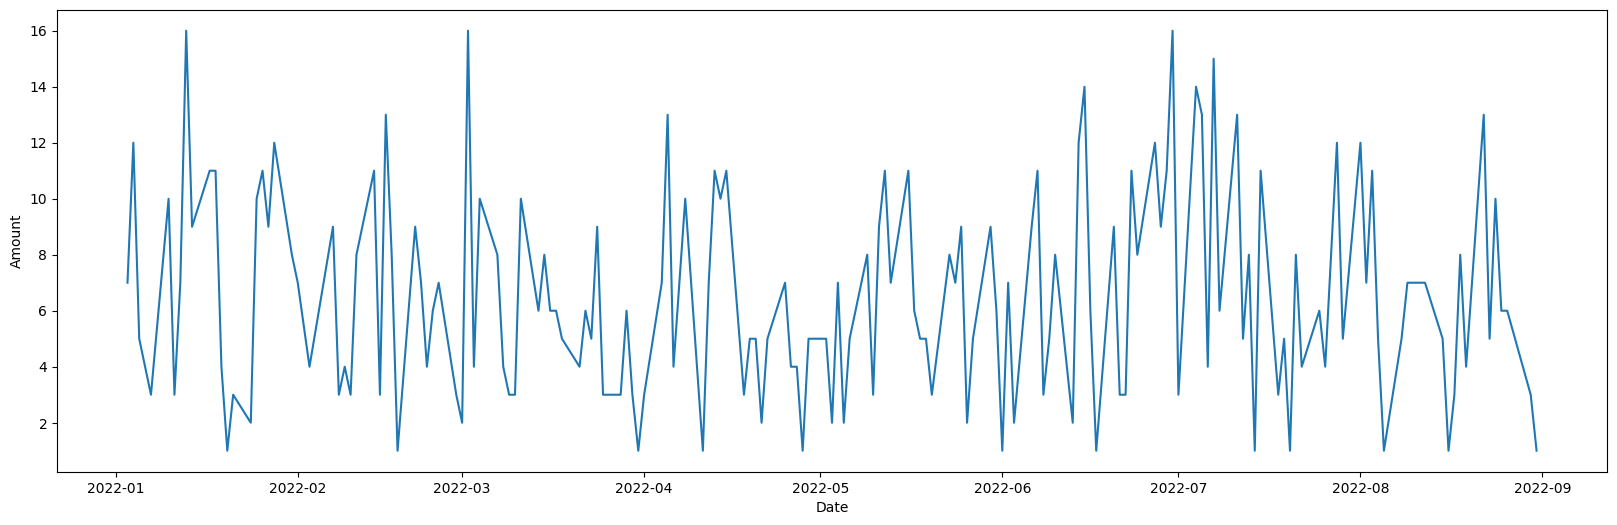

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data.groupby('Date')['Amount'].count().reset_index(), x='Date', y='Amount')

grafico de dispersion de los ingresos por ventas y la cantidad de cajas vendidas

<Axes: xlabel='Boxes Shipped', ylabel='Amount'>

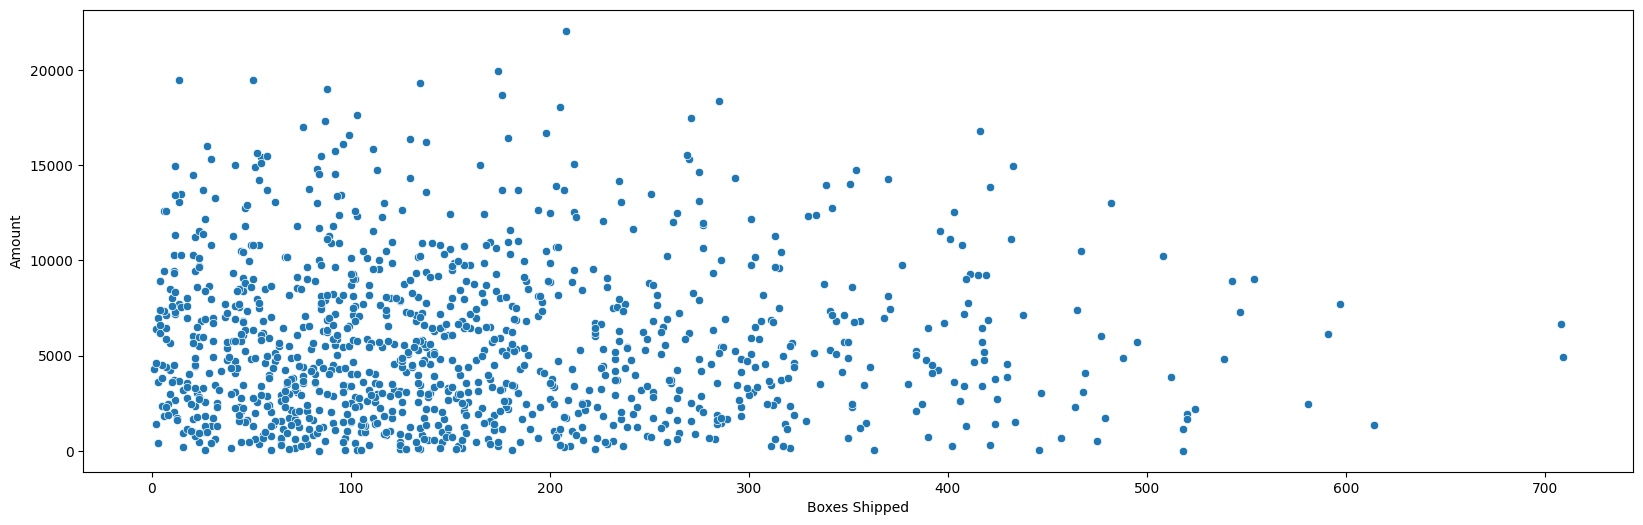

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(data, x='Boxes Shipped', y='Amount')

## 4. Identificacion de datos peculiares

Identifique el pais con mas ventas de chocolate

In [ ]:
#Asumo que los productos de chocolate son los que tienen 'Choco' en su nombre.

country_data = data.loc[(data.Product.str.contains('Choco'))] #Filtro segun producto tenga choco
country_data.groupby(['Country'])['Product'].count().reset_index().sort_values(by='Product') #Agrupo por pais y cuento la cantidad, Australia es el que mas ventas tiene de chocolate


,Country,Product
2,India,57
5,USA,57
4,UK,58
1,Canada,59
3,New Zealand,62
0,Australia,72


identifique el producto mas popular de cada paıs

In [ ]:
pop_country = data.groupby(['Country', 'Product'])['Boxes Shipped'].sum().reset_index()
pop_country

,Country,Product,Boxes Shipped
0,Australia,50% Dark Bites,3182
1,Australia,70% Dark Bites,2103
2,Australia,85% Dark Bars,1200
3,Australia,99% Dark & Pure,1350
4,Australia,After Nines,912
...,...,...,...
127,USA,Peanut Butter Cubes,1209
128,USA,Raspberry Choco,1497
129,USA,Smooth Sliky Salty,1320
130,USA,Spicy Special Slims,1385


In [ ]:
ids = pop_country.groupby('Country')['Boxes Shipped'].idxmax() #Agrupo por pais y obtengo por cada uno el indice en el dataframe pop_coutry tal que ese indice sea el producto mas vendido
ids

,Boxes Shipped
Country,
Australia,0
Canada,30
India,64
New Zealand,80
UK,101
USA,121


In [ ]:
pop_country.loc[ids] # Traigo la fila segun el indice para poder ver el producto mas popular de cada pais

,Country,Product,Boxes Shipped
0,Australia,50% Dark Bites,3182
30,Canada,Choco Coated Almonds,2452
64,India,Spicy Special Slims,2037
80,New Zealand,Mint Chip Choco,2537
101,UK,Milk Bars,2251
121,USA,Fruit & Nut Bars,2061


Calcule la cantidad de vendedores por cada paıs

In [ ]:
country_vendors = data.groupby(['Country', 'Sales Person']).size().reset_index(name='cantidad_ventas')
country_vendors.head(27)

,Country,Sales Person,cantidad_ventas
0,Australia,Andria Kimpton,7
1,Australia,Barr Faughny,6
2,Australia,Beverie Moffet,8
3,Australia,Brien Boise,11
4,Australia,Camilla Castle,7
5,Australia,Ches Bonnell,8
6,Australia,Curtice Advani,9
7,Australia,Dennison Crosswaite,9
8,Australia,Dotty Strutley,10
9,Australia,Gigi Bohling,9


In [ ]:
country_vendors.groupby('Country')['Sales Person'].count() #Vemos que cada pais tiene 25 vendedores

,Sales Person
Country,
Australia,25
Canada,25
India,25
New Zealand,25
UK,25
USA,25


## 5. Analisis de datos

¿Las ventas de chocolate dependen de la epoca del año? Analice el pais con mayor cantidad de ventas.

In [ ]:

data.groupby('Country')['Amount'].count() #El pais que mas ventas tiene es Australia

,Amount
Country,
Australia,205
Canada,175
India,184
New Zealand,173
UK,178
USA,179


In [ ]:
country_data #Recordemos acá tenemos los datos de ventas de chocolate
aus_data = country_data.loc[country_data.Country == 'Australia'].groupby('Date')['Amount'].count().reset_index() #Filtro para Australia y agrupo por fecha

aus_data.head(10)

,Date,Amount
0,2022-01-04,1
1,2022-01-07,1
2,2022-01-11,1
3,2022-01-12,1
4,2022-01-13,2
5,2022-01-19,1
6,2022-01-25,2
7,2022-01-26,3
8,2022-02-08,1
9,2022-02-15,1


In [ ]:
#Entre medio de las fechas que hubo ventas estan las fechas en las que no se vendio nada, entonces si grafico asi nomas nunca se va a ver reflejado que en alguna fecha hubo 0 ventas.

fecha_rango = pd.date_range(start=aus_data['Date'].min(), end=aus_data['Date'].max()) # Creo un rango de fechas completo desde la mínima hasta la máxima
aus_data = pd.DataFrame({'Date': fecha_rango}).merge(aus_data, on='Date', how='left').fillna({'Amount': 0})  #Completo los días faltantes en aus_data con 0 ventas antes de graficarlo.
aus_data.head(10)

,Date,Amount
0,2022-01-04,1.0
1,2022-01-05,0.0
2,2022-01-06,0.0
3,2022-01-07,1.0
4,2022-01-08,0.0
5,2022-01-09,0.0
6,2022-01-10,0.0
7,2022-01-11,1.0
8,2022-01-12,1.0
9,2022-01-13,2.0


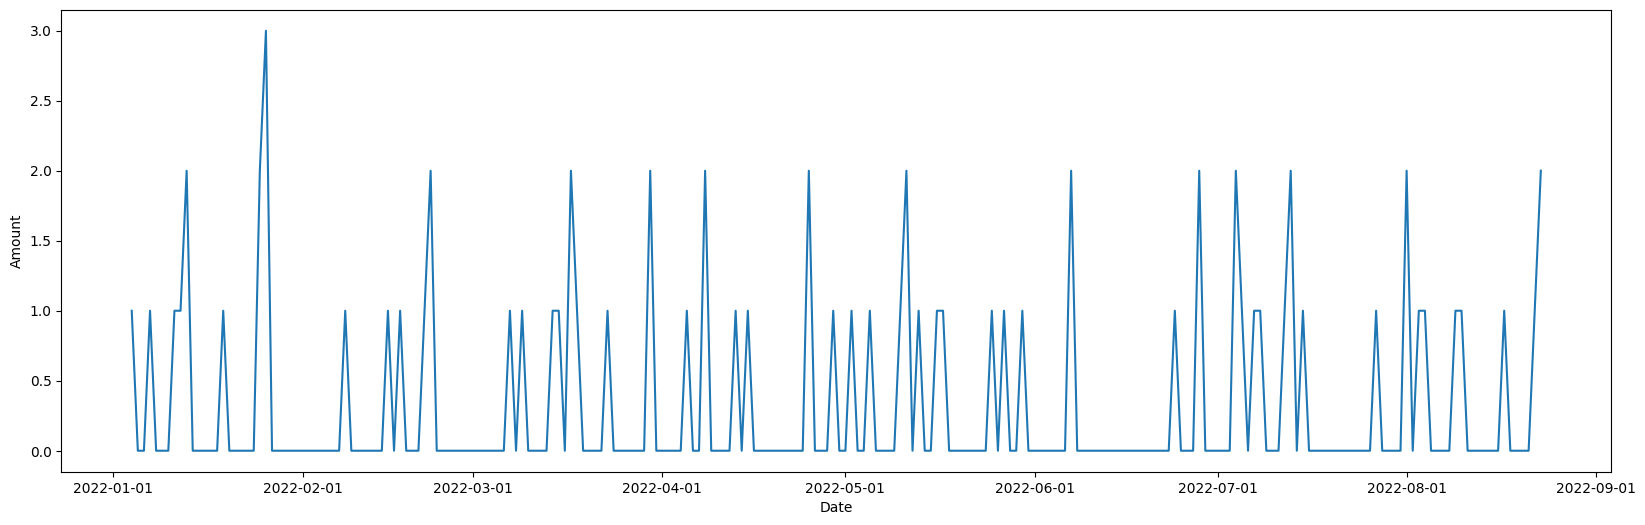

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,6))
sns.lineplot(aus_data, x='Date', y='Amount')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

<Axes: xlabel='Date', ylabel='Amount'>

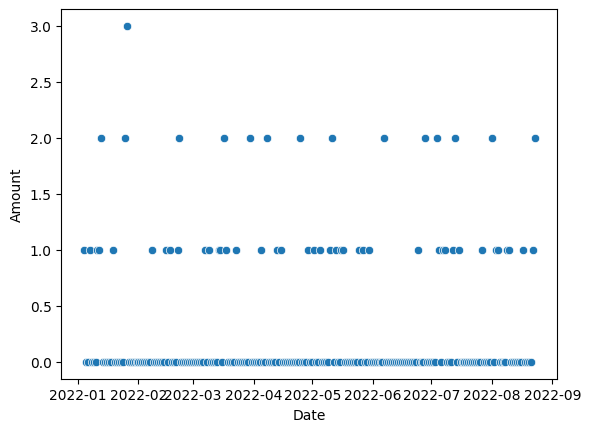

In [ ]:
sns.scatterplot(aus_data, x='Date', y='Amount')

In [ ]:
#En conclusion no creo que las ventas de chocolate en Australia dependan de la epoca del año, ya que no hay indicios en el grafico de que el numero de ventas sea mucho mayor en una epoca especifica comparada con las demas.

¿La cantidad de ventas depende del precio de la caja?

<Axes: xlabel='Price per Box', ylabel='Count'>

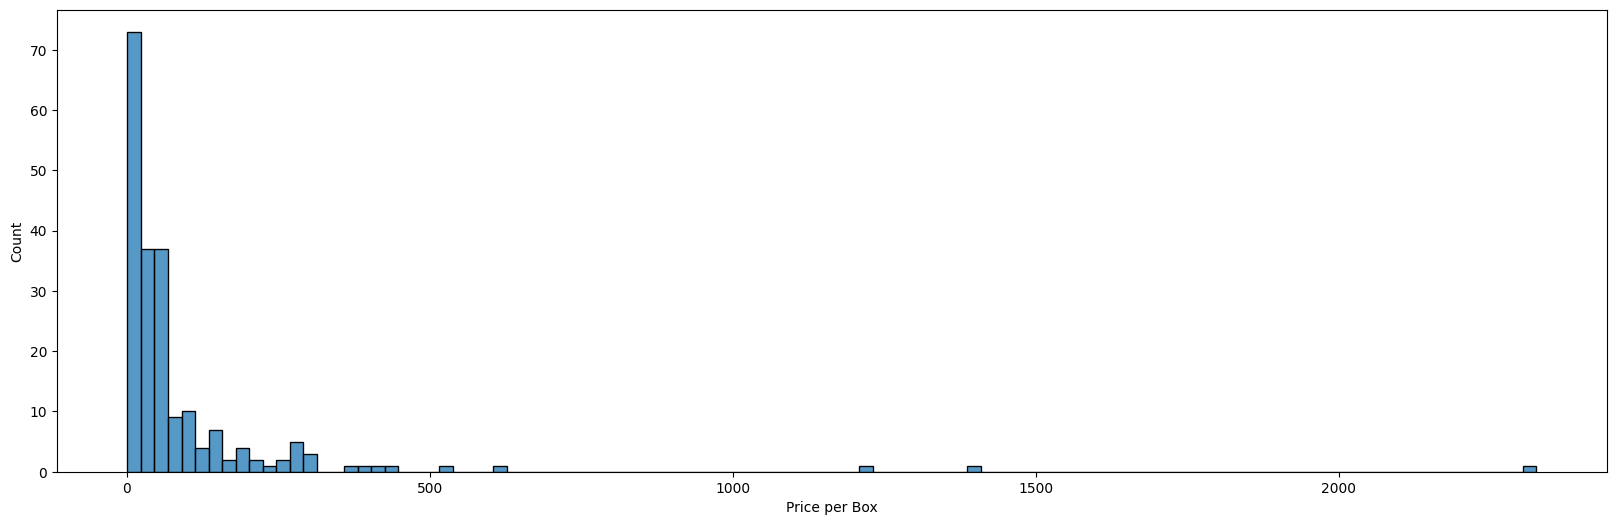

In [ ]:

# Voy a hacer un histograma en la columna "Price per box"

plt.figure(figsize=(20,6))
sns.histplot(data.loc[data.Country == 'Australia'], x='Price per Box')

In [ ]:
#Vemos que si, se realizaron mas ventas cuando el precio por caja fue mas bajo.

## Ejercicio 1 Reglas de Decision

Vimos en el ejercicio 3 del practico 2 que la probabilidad de error para esta regla de decision es:


$p(error) = p(w1) (\int_{-\infty}^{\theta} p(x|w1) \,dx) + p(w2) (\int_{\theta}^{\infty} p(x|w2) \,dx)  $

$p(error) = 0.4 * P(X≤\theta) + 0.6 * P(Y≥\theta)  $

Donde X e Y son variables aleatorias de distribucion normal representando  p(x|w1) y  p(x|w2) respectivamente.

$p(error) = 0.4 * (1-0.7157) + 0.6 * (1-0.6915)  $

$p(error) = 0.29882  $



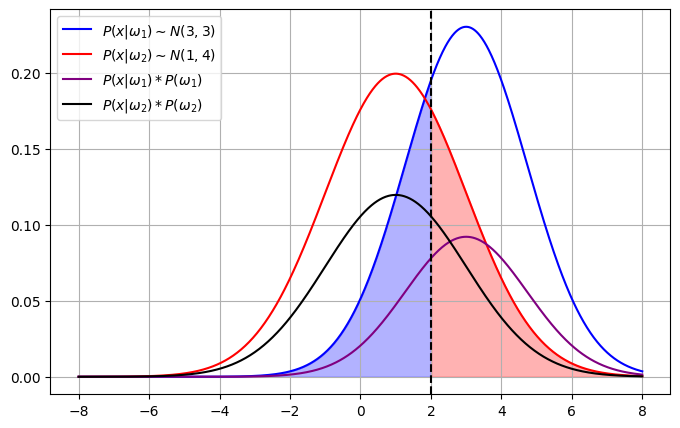

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu1, sigma1 = 3, np.sqrt(3)  # Media y desviación estándar de P(x|ω1)
mu2, sigma2 = 1, np.sqrt(4)  # Media y desviación estándar de P(x|ω2)
theta = 2

# Crear un rango de valores para x
x = np.linspace(-8, 8, 1000)

# Calcular las densidades de probabilidad
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)


# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, pdf1, label=r'$P(x|\omega_1) \sim N(3,3)$', color='blue')
plt.plot(x, pdf2, label=r'$P(x|\omega_2) \sim N(1,4)$', color='red')

plt.plot(x, pdf1*0.4, label=r'$P(x|\omega_1)*P(\omega_1)$', color='purple')
plt.plot(x, pdf2*0.6, label=r'$P(x|\omega_2)*P(\omega_2)$', color='black')

# Dibujar la línea de decisión en theta = 2
plt.axvline(theta, color='black', linestyle='--')

# Sombrear las regiones de error
x_error1 = np.linspace(-8, theta, 500)
x_error2 = np.linspace(theta, 8, 500)

plt.fill_between(x_error1, norm.pdf(x_error1, mu1, sigma1), color='blue', alpha=0.3)
plt.fill_between(x_error2, norm.pdf(x_error2, mu2, sigma2), color='red', alpha=0.3)

plt.legend()
plt.grid()

Las formas de error son:

- Se elige w1 ya que x>θ=2, pero es w2.
  
  En este caso el error es p(x>2 | w2), osea el area bajo la curva roja desde x=2 hasta $ \infty $, que es de 0.3085.

- Se elige w2 ya que x<=θ=2, pero es w1.

  En este caso el error es p(x<=2 | w1), osea el area bajo la curva azul desde x=2 hasta $-\infty$, que es de 0.2843

El umbral de decision en 2 pareciera no ser el optimo (en el sentido que minimize el error), ya que por lo visto en el ejercicio 3 del practico 2 la condicion necesaria para minimizar el error es que suceda:

$ p(\theta | w1)*p(w1) = p(\theta | w2)*p(w2) $

En el grafico vemos la interseccion, y esta es distinta de 2.